In [132]:
from IPython.display import display, Math
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

### Define function

In [133]:
def show_matrix(A):
    plt.imshow(np.abs(A))
    plt.colorbar()
    plt.title(r"$|\mathcal{T}_{\text{choi}}|$")
    plt.show()

In [134]:
def complex_ndarray_to_latex_polar(A, precision=3, tol=1e-12):
    rows = []
    for row in A:
        entries = []
        for z in row:
            r = np.abs(z)
            theta = np.angle(z)

            if r < tol:
                entries.append("0")
            elif abs(theta) < tol:
                entries.append(f"{r:.{precision}f}")
            else:
                entries.append(
                    f"{r:.{precision}f} e^{{{theta:.{precision}f}\\,\\mathrm{{i}}}}"
                )
        rows.append(" & ".join(entries))

    body = r" \\ ".join(rows)
    return r"\begin{pmatrix}" + body + r"\end{pmatrix}"

In [135]:
def apply_channel_from_choi(A, x):
    d_in = x.shape[0]
    d_out = A.shape[0] // d_in

    IxT = np.kron(np.eye(d_out), x.T)
    M = IxT @ A

    M = M.reshape(d_out, d_in, d_out, d_in)

    y = np.einsum('a i b i -> a b', M)

    return y

In [136]:
def copy_maker(x, n_copies):
    result = x
    for _ in range(n_copies - 1):
        result = np.kron(result, x)
    return result


def fidelity(x, y):
    sqrt_x = sqrtm(x)
    m = sqrt_x @ y @ sqrt_x

    sqrt_m = sqrtm(m)
    F = np.real(np.trace(sqrt_m))**2

    return F

In [137]:
def pure_state_maker(d, k):
    x = np.zeros((d, d), dtype=complex)
    x[k, k] = 1.0
    return x

def maximally_mixed_state_maker(d):
    x = np.eye(d, dtype=complex)
    x /= d
    return x

def random_mixed_state_maker(d):
    A = np.random.randn(d, d) + 1j * np.random.randn(d, d)
    rho = A @ A.conj().T
    rho /= np.trace(rho)
    
    return rho

### Load choi operator

In [138]:
# change this parameter!!!

d = 2

n_in = 1
n_out = 2

A = np.load(f"ref/data/{n_in}_to_{n_out}.npy")

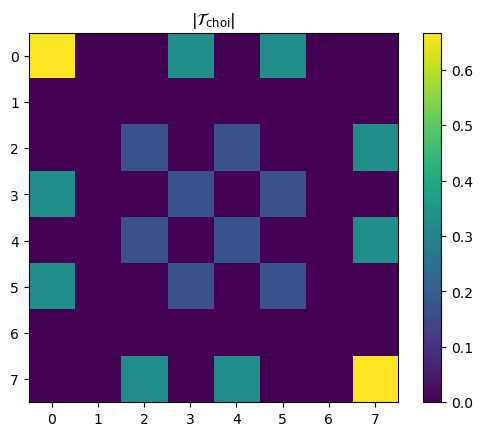

In [139]:
show_matrix(A)

In [140]:
x_pure = pure_state_maker(d, 0) 
y_pure = apply_channel_from_choi(A, copy_maker(x_pure, n_in))

latex_str = complex_ndarray_to_latex_polar(y_pure)
display(Math(r"y = " + latex_str))
print("Pure state fidelity: ", fidelity(copy_maker(x_pure, n_out), y_pure))

<IPython.core.display.Math object>

Pure state fidelity:  0.6666658084843651


In [141]:
x_max = maximally_mixed_state_maker(d) 
y_max = apply_channel_from_choi(A, copy_maker(x_max, n_in))

latex_str = complex_ndarray_to_latex_polar(y_max)
display(Math(r"y = " + latex_str))
print("Maximally mixed state fidelity: ", fidelity(copy_maker(x_max, n_out), y_max))

<IPython.core.display.Math object>

Maximally mixed state fidelity:  0.7508906309760234


In [159]:
x_rand = random_mixed_state_maker(d) 
print(x_rand)
y_rand = apply_channel_from_choi(A, copy_maker(x_rand, n_in))

latex_str_x = complex_ndarray_to_latex_polar(copy_maker(x_rand, n_out))
latex_str_y = complex_ndarray_to_latex_polar(y_rand)
# display(Math(r"x = " + latex_str_x))
# display(Math(r"y = " + latex_str_y))
print("Random mixed state fidelity: ", fidelity(copy_maker(x_rand, n_out), y_rand))

[[0.46915575-7.55696979e-18j 0.29734261-2.84972211e-01j]
 [0.29734261+2.84972211e-01j 0.53084425+7.55696979e-18j]]
Random mixed state fidelity:  0.803273505888067
